In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
df_titanic = pd.read_csv(r'C:\Users\kodur\Desktop\Datasets\train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


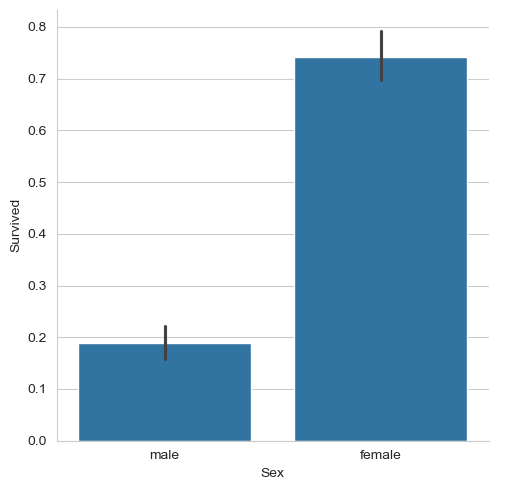

In [5]:
sns.catplot(x='Sex', y='Survived', data=df_titanic, kind='bar')

<Axes: xlabel='Sex', ylabel='count'>

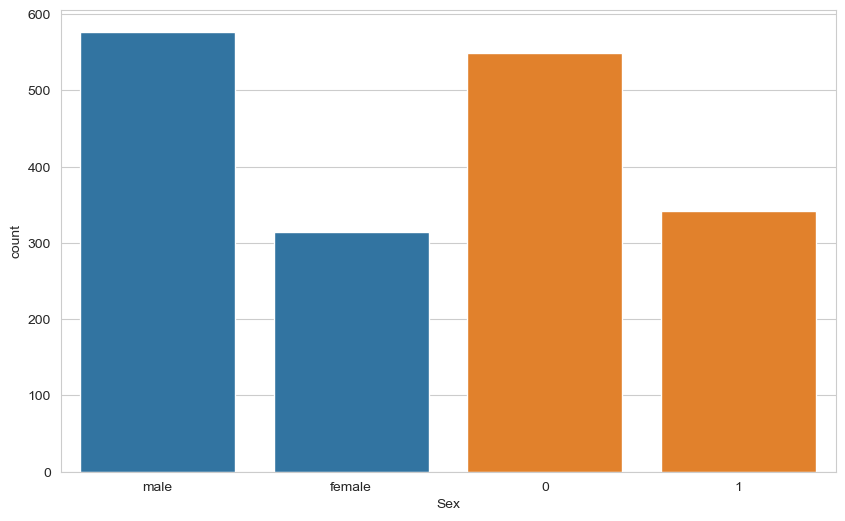

In [6]:
sns.countplot(x='Sex', data=df_titanic)
sns.countplot(x='Survived', data=df_titanic)

In [7]:
def lifestage(person):
    sex,age = person
    if age < 16:
        return 'child'
    else:
        return sex

df_titanic['Person'] = df_titanic[['Sex','Age']].apply(lifestage, axis=1)
df_titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


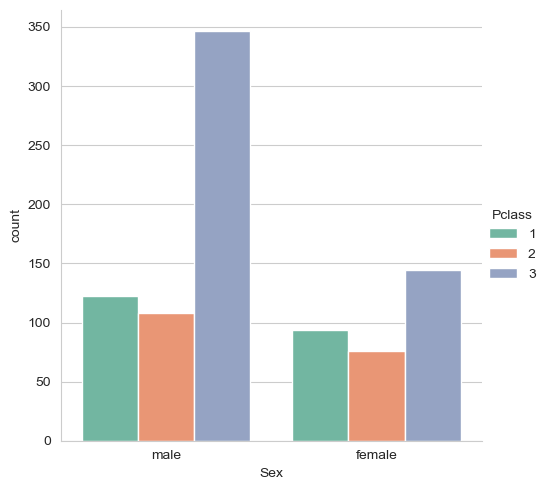

In [8]:
sns.catplot(x='Sex', data=df_titanic, hue='Pclass', kind='count', palette='Set2')

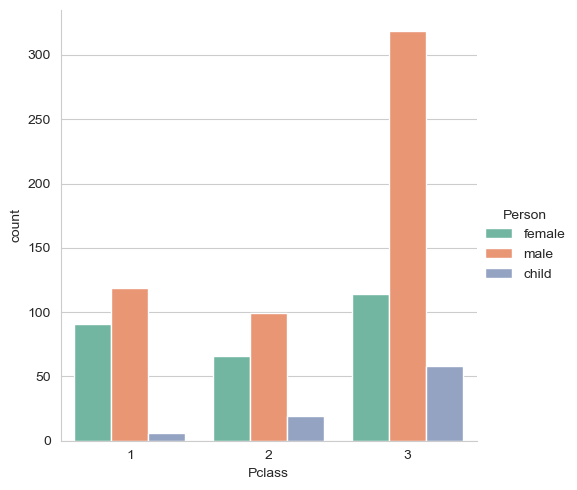

In [9]:
sns.catplot(x='Pclass', data=df_titanic, hue='Person', kind='count', palette='Set2')

<Axes: >

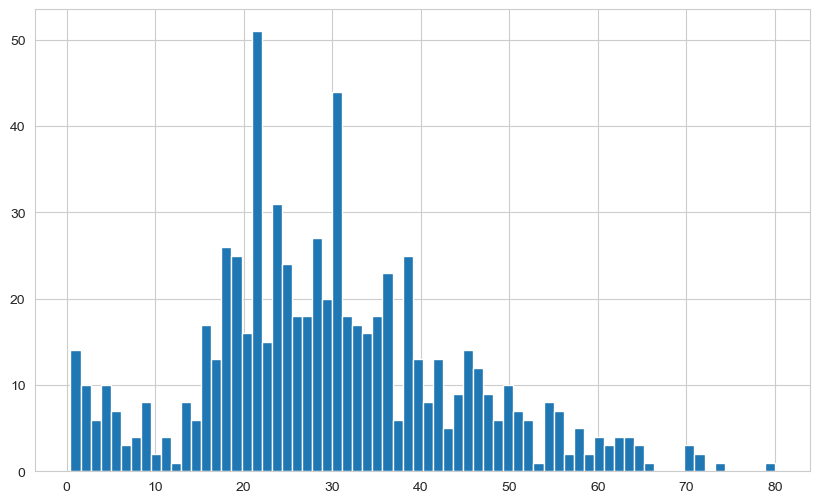

In [10]:
df_titanic['Age'].hist(bins=70)

In [12]:
df_titanic['Age'].mean()

29.69911764705882

In [13]:
df_titanic['Person'].value_counts()

Person
male      537
female    271
child      83
Name: count, dtype: int64

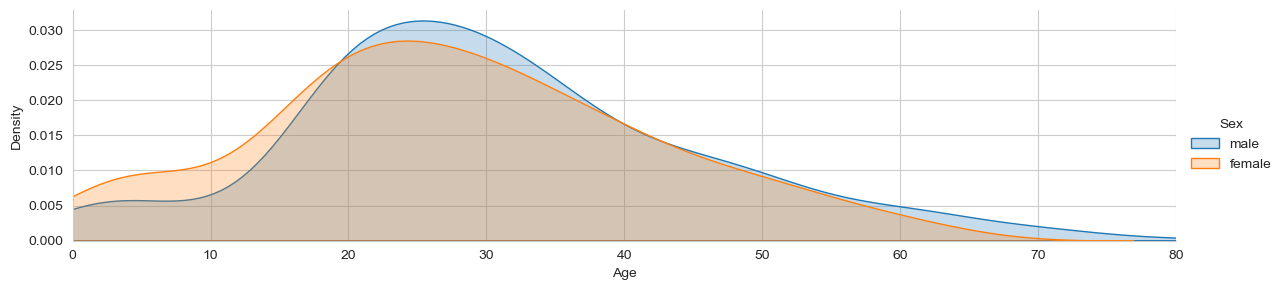

In [16]:
fig = sns.FacetGrid(df_titanic, hue='Sex', aspect=4)

fig.map(sns.kdeplot, 'Age', fill=True)

oldest = df_titanic['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

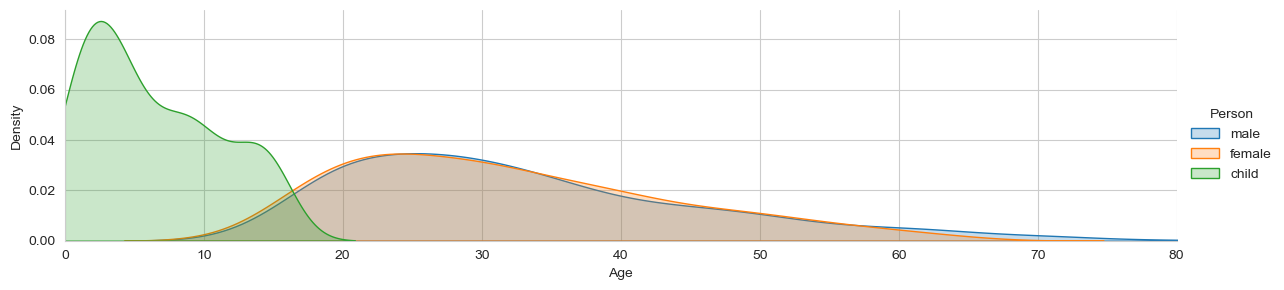

In [17]:
fig = sns.FacetGrid(df_titanic, hue='Person', aspect=4)

fig.map(sns.kdeplot, 'Age', fill=True)

oldest = df_titanic['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

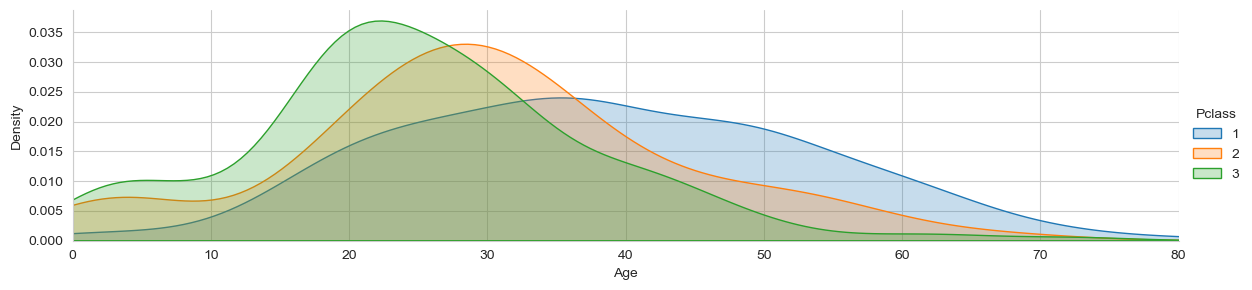

In [18]:
fig = sns.FacetGrid(df_titanic, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age', fill=True)

oldest = df_titanic['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

In [19]:
deck = df_titanic['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

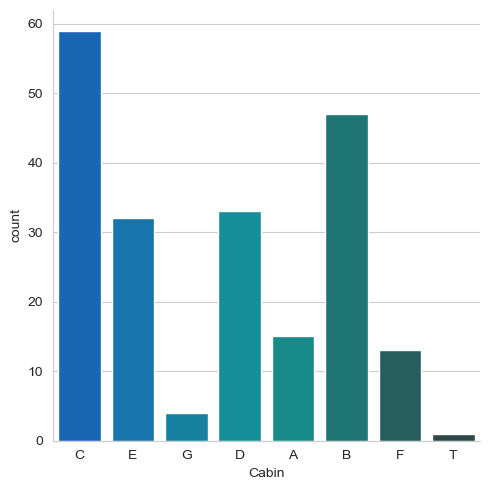

In [21]:
level = []

for levels in deck :
    level.append(levels[0])

df_cabin = DataFrame(level)

df_cabin.columns = ['Cabin']

df_cabin.head()

sns.catplot(x='Cabin', data=df_cabin, hue='Cabin', kind='count', palette='winter_d', legend=False)

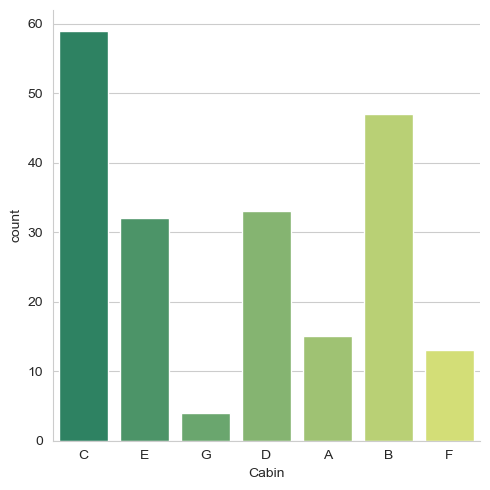

In [22]:
df_cabin = df_cabin[df_cabin.Cabin != 'T']

sns.catplot(x='Cabin', data=df_cabin, hue='Cabin', kind='count', palette='summer', legend=False)

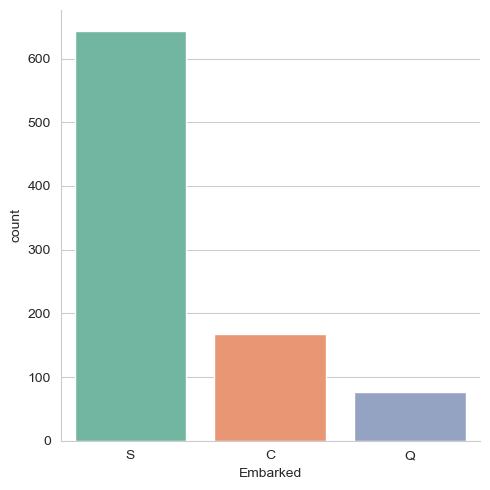

In [23]:
sns.catplot(x='Embarked', data=df_titanic, hue='Embarked', kind='count', palette='Set2', legend=False)

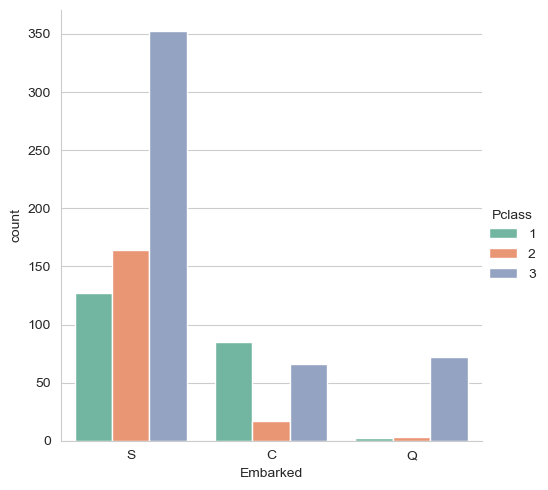

In [25]:
sns.catplot(x='Embarked', data=df_titanic, hue='Pclass', kind='count', palette='Set2', legend=True)

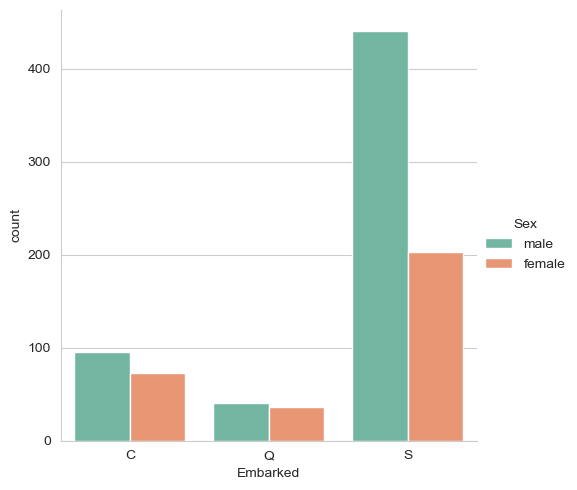

In [26]:
sns.catplot(x='Embarked', data=df_titanic, hue='Sex', kind='count', palette='Set2', legend=True, order=['C', 'Q', 'S'])

In [27]:
df_titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [29]:
df_titanic['Status'] = df_titanic.SibSp + df_titanic.Parch

df_titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,1


In [30]:
df_titanic['Status'].loc[df_titanic['Status'] > 0] = 'with family'

df_titanic['Status'].loc[df_titanic['Status'] == 0] = 'alone'

C:\Users\kodur\AppData\Local\Temp\ipykernel_4000\36599074.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_titanic['Status'].loc[df_titanic['Status'] > 0] = 'with family'
C:\Users\kodur\AppData\Local\Temp\ipykernel_4000\36599074.py:1: 

In [33]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


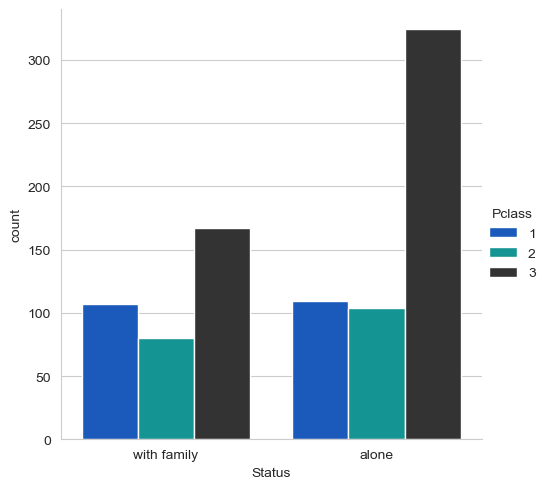

In [34]:
sns.catplot(x='Status', data=df_titanic, hue='Pclass', kind='count', palette='winter_d')

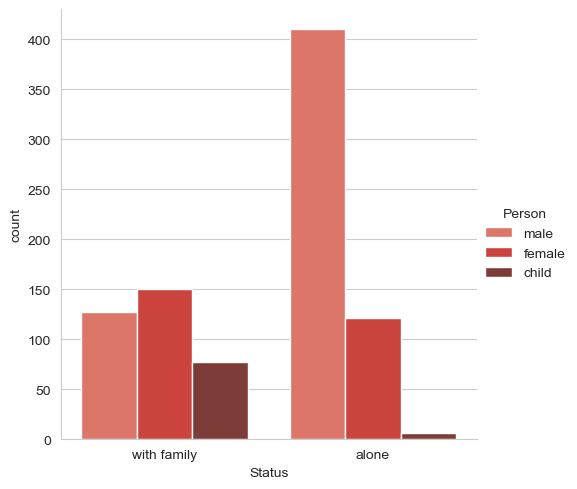

In [35]:
sns.catplot(x='Status', data=df_titanic, hue='Person', kind='count', palette='Reds_d')

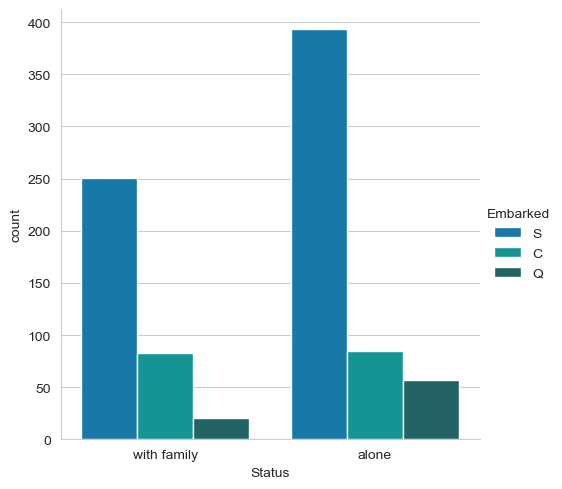

In [36]:
sns.catplot(x='Status', data=df_titanic, hue='Embarked', kind='count', palette='winter_d')

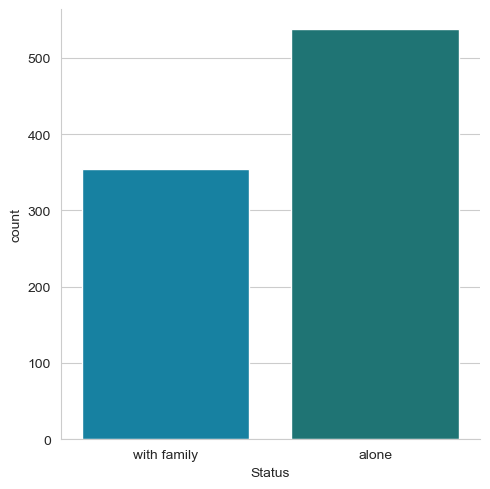

In [37]:
sns.catplot(x='Status', data=df_titanic, hue='Status', kind='count', palette='winter_d')

In [38]:
df_titanic['Survive'] = df_titanic['Survived'].map({0 : 'no', 1 : 'yes'})

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Status,Survive
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


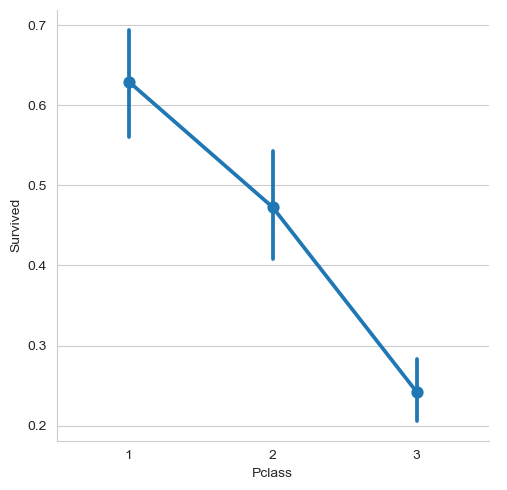

In [40]:
sns.catplot(x='Pclass', y='Survived', data=df_titanic, kind='point')

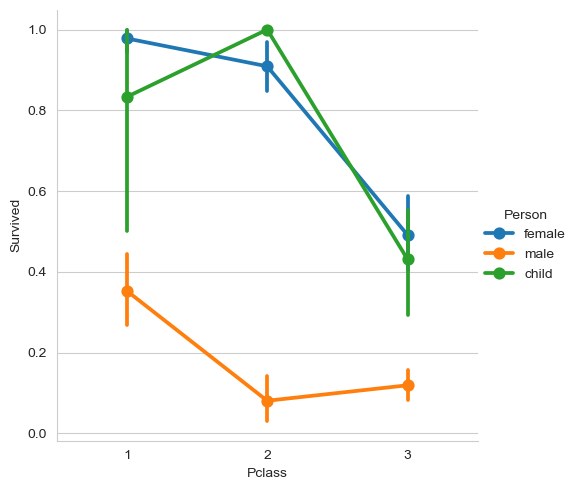

In [41]:
sns.catplot(x='Pclass', y='Survived', data=df_titanic, hue='Person', kind='point')

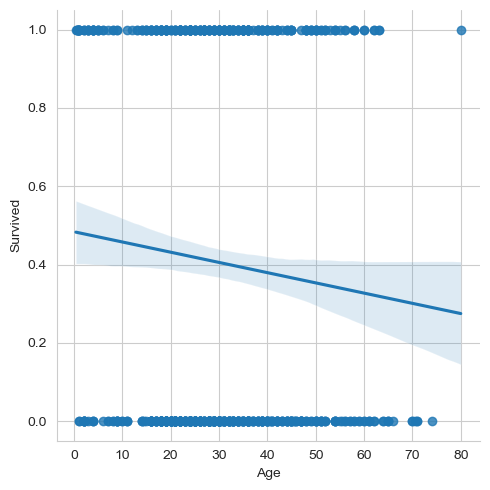

In [43]:
sns.lmplot(x='Age', y='Survived', data=df_titanic)

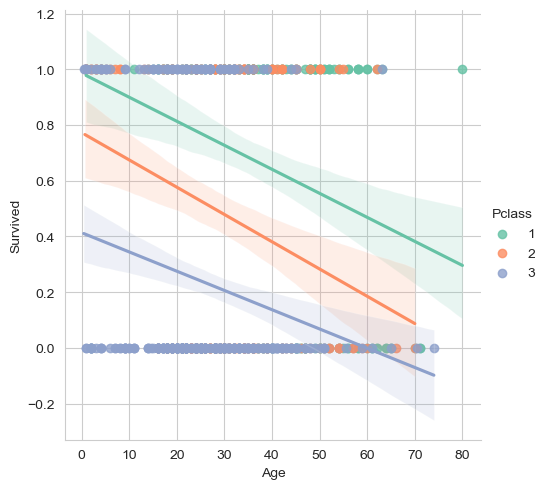

In [44]:
sns.lmplot(x='Age', y='Survived', data=df_titanic, hue='Pclass', palette='Set2')

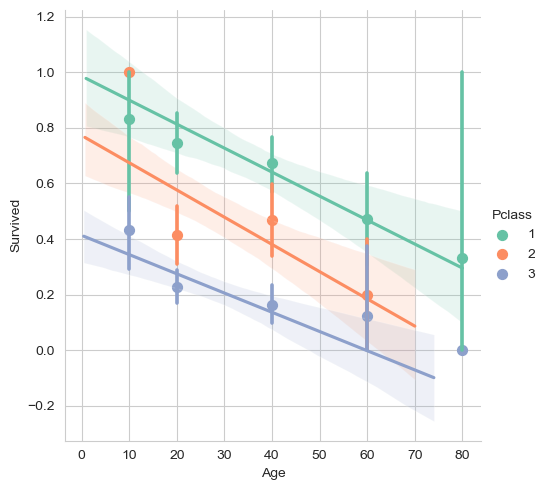

In [47]:
age_limit = [10, 20, 40, 60, 80]

sns.lmplot(x='Age', y='Survived', data=df_titanic, hue='Pclass', palette='Set2', x_bins=age_limit)

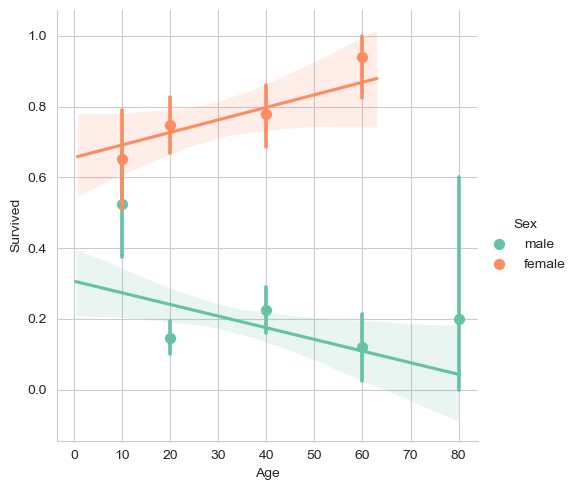

In [48]:
sns.lmplot(x='Age', y='Survived', data=df_titanic, hue='Sex', palette='Set2', x_bins=age_limit)

In [58]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Status,Survive
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


In [73]:
df_deck = df_titanic[['Survived', 'Person','Cabin']].dropna(subset=['Cabin'])

df_deck.head()

,Survived,Person,Cabin
1,1,female,C85
3,1,female,C123
6,0,male,E46
10,1,child,G6
11,1,female,C103


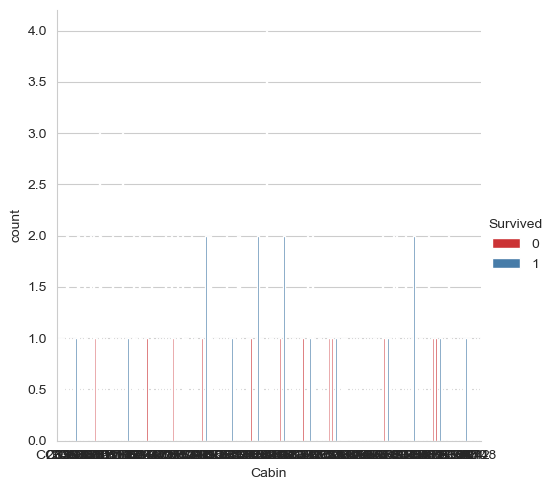

In [81]:
sns.catplot(x='Cabin', data=df_deck, hue='Survived', palette='Set1', kind='count')